In [2]:
import os 
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sys
sys.path.append('../..')
from data.data_loader import get_splits
from utils.plot import plot_2D

data = get_splits('../../data/vehicles_clean_encoded.csv', 0.2)

#display(data)

"""new_data = data[data['Model'] != 'NOTVALID']
display(new_data['Model'])
price_data=new_data['Price']
features_data=new_data.drop('Price',1)"""



"""x = features_data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
features_data = pd.DataFrame(x_scaled)
display(features_data)"""
X_train = data['X_train']
y_train = data['Y_train']
X_test = data['X_test']
y_test = data['Y_test']

display(X_train)
display(y_train)
display(X_test)
display(y_test)




starting to read csv...
finished reading csv.
splitting data into training and testing sets.


,year,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
5203,29,160000.0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
50557,9,162890.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147024,6,26476.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
253151,6,242474.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96898,7,61529.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14095,17,163704.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
166104,5,30580.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25771,28,217609.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
326289,5,39840.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


5203       6800
50557      9499
147024    13000
253151    22800
96898        74
          ...  
14095      4000
166104    12795
25771      1600
326289    25890
327571      550
Name: price, Length: 266973, dtype: int64

,year,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
229414,8,126.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
245877,11,79000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
309732,7,154616.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
192816,13,170000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118806,8,126736.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312323,9,175289.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
86810,15,199943.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300693,4,18000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
163844,6,100007.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


229414     7900
245877     7500
309732     9800
192816     1600
118806    30750
          ...  
312323    24900
86810      3600
300693    14500
163844    21800
275664     3500
Name: price, Length: 66744, dtype: int64

In [3]:
"""X_train = X_train.convert_objects(convert_numeric=True)
y_train = y_train.convert_objects(convert_numeric=True)
X_test = X_test.convert_objects(convert_numeric=True)
y_test = y_test.convert_objects(convert_numeric=True)"""

col_data = "entry_num,price,year,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porche,manufacturer_ram,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,model_1 Ton,model_100,model_150,model_1500,model_1500 CLASSIC,model_164,model_20,model_200,model_200S,model_210,model_240Z,model_250,model_2500,model_2500 HD,model_280Z,model_300,model_300SRT8,model_308,model_3100,model_348,model_350,model_3500,model_350Z,model_360,model_370Z,model_370Z ROADSTER,model_4500,model_456,model_458 Italia,model_458 Spider,model_488,model_4C,model_4RUNNER,model_500,model_500 Abarth,model_500E,model_500L,model_500X,model_512,model_550,model_5500,model_600,model_626,model_86,model_911,model_A-CLASS,model_A3,model_A4,model_A5,model_A6,model_A7,model_A8,model_ALLANTE,model_ALLURE,model_ALTIMA,model_AMG GT,model_APOLLO,model_ARMADA,model_ASCENT,model_ASTRA,model_ATS,model_AURA,model_AVALON,model_Acadia,model_Acadia Denali,model_Accent,model_Accord,model_Accord Coupe,model_Accord Crosstour,model_Accord Hybrid,model_Accord Sedan,model_Accord Wagon,model_Amanti,model_Apache,model_Arteon,model_Aspen,model_Astro,model_Atlas,model_Avalanche,model_Avenger,model_Aveo,model_Aviator,model_Azera,model_B-CLASS,model_B-SERIES,model_B2300,model_B9 TRIBECA,model_BAJA,model_BONNEVILLE,model_BRZ,model_Beetle,model_Bel Air,model_Biscayne,model_Blazer,model_Bolt EV,model_Borrego,model_Bronco,model_Brougham,model_C-CLASS,model_C-HR,model_C-Max,model_C/K 2500,model_C10,model_C30,model_C70,model_CAMRY,model_CAMRY HYBRID,model_CAMRY SOLORA,model_CARGO VAN,model_CASCADA,model_CAYENNE,model_CC,model_CELICA,model_CENTURY,model_CJ,model_CJ-5,model_CJ-7,model_CL,model_CL-CLASS,model_CLA-CLASS,model_CLK-CLASS,model_CLS-CLASS,model_CLUBMAN,model_CONVERTIBLE,model_COOPER,model_COROLLA,model_COROLLA HATCHBACK,model_COROLLA IM,model_COUGAR,model_COUNTRYMAN,model_COUPE,model_CR-V,model_CR-Z,model_CROSS,model_CROSSTREK,model_CT,model_CT6,model_CTS,model_CUBE,model_CX-3,model_CX-5,model_CX-7,model_CX-9,model_Cabrio,model_Cadenza,model_Caliber,model_California,model_Camaro,model_Canyon,model_Caprice,model_Captiva,model_Caravan,model_Cavalier,model_Challenger,model_Charger,model_Chateau,model_Cherokee,model_Chevelle,model_Chevette,model_Cheyenne,model_Cirrus,model_City Express,model_Civic,model_Civic Coupe,model_Civic Hatchback,model_Civic Sedan,model_Civic Type R,model_Civic del Sol,model_Clarity Plug-In Hybrid,model_Club Wagon,model_Cobalt,model_Cobra,model_Colorado,model_Commander,model_Compass,model_Concorde,model_Continental,model_Contour,model_Cordoba,model_Coronet,model_Corsica,model_Corvair,model_Corvette,model_Coupe DeVille,model_Crossfire,model_Crosstour,model_Crown Victoria,model_Cruze,model_DAKOTA,model_DB7,model_DB9,model_DIAMANTE,model_DTS,model_Dakota,model_Dart,model_Daytona,model_DeVille,model_Delray,model_Deluxe,model_Denali,model_Discovery,model_Discovery Sport,model_Durango,model_E-450,model_E-CLASS,model_E-Golf,model_E-Series,model_E3,model_E4,model_ECHO,model_ECLIPSE,model_ECLIPSE CROSS,model_EL,model_ELECTRA,model_ELR,model_ENCLAVE,model_ENCORE,model_ENDEAVOR,model_ENVISION,model_ES,model_EX,model_EcoSport,model_Econoline/Club Wagon,model_Edge,model_El Camino,model_Elantra,model_Elantra Coupe,model_Elantra GT,model_Elantra Touring,model_Eldorado,model_Element,model_Entourage,model_Envoy,model_Eos,model_Equinox,model_Equus,model_Escalade,model_Escalade ESV,model_Escalade EXT,model_Escape,model_Escort,model_Eurovan,model_Excursion,model_Expedition,model_Explorer,model_F-100,model_F-150,model_F-250,model_F-250 HD,model_F-350,model_F-Pace,model_F-Type,model_F430,model_F430 Spider,model_FF,model_FIREBIRD,model_FJ CRUISER,model_FORESTER,model_FRONTIER,model_FX,model_Fairlane,model_Falcon,model_Fiesta,model_Fit,model_Five Hundred,model_Fleetwood,model_Flex,model_Focus,model_Forte,model_Forte 5-Door,model_Forte Koup,model_Forte5,model_Freestar,model_Freestyle,model_Fusion,model_G,model_G-CLASS,model_G3,model_G3 WAVE,model_G5,model_G6,model_G8,model_GALANT,model_GIULIA,model_GL-CLASS,model_GLA-CLASS,model_GLC,model_GLC-CLASS,model_GLE-CLASS,model_GLI,model_GLK-CLASS,model_GLS,model_GR SUPRA,model_GRAND AM,model_GRAND MARQUIS,model_GRAND NATIONAL,model_GRAND PRIX,model_GS,model_GS F,model_GT,model_GT-R,model_GTI,model_GTV,model_GX,model_Galaxie,model_Genesis,model_Genesis Coupe,model_Gladiator,model_Golf,model_Golf Alltrack,model_Golf R,model_Golf SportWagen,model_Golf Wagon,model_Grand Caravan,model_Grand Cherokee,model_Grand Marquis,model_HARDTOP,model_HHR,model_HIGHLANDER,model_HIGHLANDER HYBRID,model_HR-V,model_HS,model_I,model_I-MIEV,model_I3,model_I8,model_ILX,model_IMPREZA,model_IMPREZA WRX,model_INTEGRA,model_ION,model_IS,model_IS 200t,model_IS C,model_IS F,model_Impala,model_Imperial,model_Insight,model_Intrepid,model_Ioniq,model_Ioniq Electric,model_Ioniq Hybrid,model_JUKE,model_JX35,model_Jetta,model_Jimmy,model_Journey,model_K10 Blazer,model_K900,model_KICKS,model_Kona,model_Kona Electric,model_L SERIES SEDAN,model_L SERIES WAGON,model_LANCER,model_LANCER EVOLUTION,model_LANCER SPORTBACK,model_LC,model_LCF,model_LEAF,model_LEGACY,model_LEGEND,model_LR2,model_LR3,model_LS,model_LTD,model_LUCERNE,model_LW,model_LX,model_LeBaron,model_Liberty,model_Limousine,model_Lumina,model_M,model_M-CLASS,model_M2,model_M3,model_M35h,model_M4,model_M5,model_M56x,model_M6,model_M7,model_MARAUDER,model_MATRIX,model_MAXIMA,model_MAZDA2,model_MAZDA3,model_MAZDA3 SPORT,model_MAZDA5,model_MAZDA6,model_MDX,model_METRIS CARGO VAN,model_METRIS PASSENGER VAN,model_MILLENIA,model_MIRAGE,model_MIRAI,model_MKC,model_MKS,model_MKT,model_MKX,model_MKZ,model_MODEL 3,model_MODEL S,model_MODEL X,model_MONTANA,model_MONTANA SV6,model_MONTERO,model_MONTERO SPORT,model_MPV,model_MURANO,model_MX-5,model_MX-5 RF,model_Magentis,model_Magnum,model_Malibu,model_Mark IV,model_Mark LT,model_Mark V,model_Mark VI,model_Mark VIII,model_Master,model_Model A,model_Model T,model_Mondial,model_Monte Carlo,model_Mustang,model_NSX,model_NV,model_NV CARGO,model_NV200,model_NX,model_NX 300,model_Nautilus,model_Navigator,model_Neon,model_New Yorker,model_Newport,model_Niro,model_Niro Plug-In Hybrid,model_Nitro,model_Nova,model_OUTBACK,model_OUTLANDER,model_OUTLANDER PHEV,model_OUTLOOK,model_Odyssey,model_Optima,model_Optima Hybrid,model_PACEMAN,model_PARK AVE,model_PATHFINDER,model_PATHFINDER ARMADA,model_PRIUS,model_PRIUS C,model_PRIUS PLUG-IN,model_PRIUS PRIME,model_PRIUS V,model_PROMASTER,model_PROMASTER CARGO VAN,model_PROMASTER CITY,model_PROMASTER CITY WAGON,model_PROTEGE,model_PROTEGE5,model_PT Cruiser,model_PURSUIT,model_Pacifica,model_Passat,model_Passport,model_Patriot,model_Phaeton,model_Pilot,model_Polara,model_Police Interceptor,model_Prelude,model_Prowler,model_Q3,model_Q5,model_Q50,model_Q60,model_Q7,model_Q70,model_Q70L,model_Q8,model_QUATTRO,model_QUEST,model_QX,model_QX30,model_QX50,model_QX56,model_QX60,model_QX70,model_QX80,model_R-CLASS,model_R8,model_RAINER,model_RAINIER,model_RANIER,model_RAPIDE,model_RAPIDE S,model_RAV4,model_RAV4 HYBRID,model_RC,model_RC 350,model_RC F,model_RDX,model_REATTA,model_REGAL,model_RELAY,model_RENDEZVOUS,model_RIVERA,model_RIVIERA,model_RL,model_RLX,model_ROADMASTER,model_ROADSTER,model_ROGUE,model_RS 3,model_RS 4,model_RS 5,model_RS 6,model_RS 7,model_RSX,model_RX,model_RX 350L,model_RX-8,model_Rabbit,model_Ranchero,model_Ranger,model_Renegade,model_Ridgeline,model_Rio,model_Rio5,model_Rondo,model_Routan,model_S-CLASS,model_S-Type,model_S10,model_S2000,model_S3,model_S4,model_S40,model_S5,model_S6,model_S60,model_S60 Cross Country,model_S7,model_S70,model_S8,model_S80,model_S90,model_SABRE,model_SC,model_SC1,model_SENTRA,model_SEQUOIA,model_SIENNA,model_SILVERADO 3500HD,model_SKY,model_SKYHAWK,model_SKYLARK,model_SL,model_SL-CLASS,model_SLC,model_SLK,model_SLK-CLASS,model_SOLSTICE,model_SPECIAL,model_SPIDER,model_SPRINTER,model_SPRINTER CARGO VAN,model_SPRINTER CREW VAN,model_SPRINTER PASSENGER VAN,model_SQ5,model_SRX,model_SSR,model_STELVIO,model_STS,model_SUNFIRE,model_SUPER,model_SX,model_Safari,model_Santa Fe,model_Santa Fe Sport,model_Santa Fe XL,model_Savana Passenger,model_Sebring,model_Sedan,model_Sedona,model_Seville,model_Sierra 1500,model_Sierra 1500 Denali,model_Sierra 2500,model_Sierra 2500 Denali,model_Sierra 3500,model_Sierra 3500 Denali,model_Silverado,model_Silverado 1500,model_Silverado 2500,model_Silverado 3500,model_Sonata,model_Sonata Hybrid,model_Sonic,model_Sonoma,model_Sorento,model_Soul,model_Soul EV,model_Spark,model_Spectra,model_Spectra5,model_Spider,model_Sportage,model_Sportvan,model_Stealth,model_Stinger,model_Stratus,model_Suburban,model_Super Bee,model_TACOMA,model_TC,model_TERRAZA,model_TITAN,model_TITAN XD,model_TJ,model_TL,model_TLX,model_TORRENT,model_TRIBECA,model_TRIBUTE,model_TSX,model_TT,model_TTS,model_TUNDRA,model_Tahoe,model_Taurus,model_Telluride,model_Tempo,model_Terrain,model_Terrain Denali,model_Thunderbird,model_Tiburon,model_Tiguan,model_Torino,model_Touareg,model_Town & Country,model_Town Car,model_Tracker,model_TrailBlazer,model_Transit Cargo Van,model_Transit Passenger Wagon,model_Traverse,model_Trax,model_Tucson,model_UX 200,model_UX 250H,model_Uplander,model_V40,model_V50,model_V60,model_V60 Cross Country,model_V70,model_V90 Cross Country,model_VANQUISH,model_VANTAGE,model_VENZA,model_VERANO,model_VERSA,model_VERSA NOTE,model_VIBE,model_VUE,model_Van,model_Vanden Plas,model_Vega,model_Veloster,model_Veloster N,model_Venture,model_Veracruz,model_Viper,model_Volt,model_WILDCAT,model_WRX,model_Wayfarer,model_Windstar,model_Wrangler,model_Wrangler JK Unlimited,model_X-Type,model_X1,model_X2,model_X3,model_X4,model_X5,model_X6,model_XC40,model_XC60,model_XC70,model_XC90,model_XC90 Hybrid,model_XE,model_XF,model_XFR,model_XJ,model_XJ6,model_XJ8,model_XJL,model_XJR,model_XJS,model_XJS Convertible,model_XJSC,model_XK,model_XKR,model_XLR,model_XT4,model_XT5,model_XT6,model_XTERRA,model_XTS,model_XV CROSSTREK,model_XV CROSSTREK-HYBRID,model_YARIS,model_Yukon,model_Yukon XL,model_Yukon XL Denali,model_Z3,model_Z4,model_ZDX,model_Zephyr,model_d'Elegance,model_del Sol,condition_-1,condition_EXCELLENT,condition_FAIR,condition_GOOD,condition_LIKE NEW,condition_NEW,condition_SALVAGE,cylinders_-1,cylinders_10 CYLINDERS,cylinders_12 CYLINDERS,cylinders_3 CYLINDERS,cylinders_4 CYLINDERS,cylinders_5 CYLINDERS,cylinders_6 CYLINDERS,cylinders_8 CYLINDERS,cylinders_OTHER,fuel_-1,fuel_DIESEL,fuel_ELECTRIC,fuel_GAS,fuel_HYBRID,fuel_OTHER,title_status_-1,title_status_CLEAN,title_status_LIEN,title_status_MISSING,title_status_PARTS ONLY,title_status_REBUILT,title_status_SALVAGE,transmission_-1,transmission_AUTOMATIC,transmission_MANUAL,transmission_OTHER,drive_-1,drive_4WD,drive_FWD,drive_RWD,type_-1,type_BUS,type_CONVERTIBLE,type_COUPE,type_HATCHBACK,type_MINI-VAN,type_OFFROAD,type_OTHER,type_PICKUP,type_SEDAN,type_SUV,type_TRUCK,type_VAN,type_WAGON,paint_color_-1,paint_color_BLACK,paint_color_BLUE,paint_color_BROWN,paint_color_CUSTOM,paint_color_GREEN,paint_color_GREY,paint_color_ORANGE,paint_color_PURPLE,paint_color_RED,paint_color_SILVER,paint_color_WHITE,paint_color_YELLOW,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY"    
col = col_data.split(",")
# drop these columns
features = col[:]
features.remove("entry_num")
features.remove("price")

display(features)
#X_train['year'] = X_train.year.astype('float')
"""for f in features:
    X_train[f] = X_train[f].astype(float)
"""
X_train.info()

['year',
 'odometer',
 'manufacturer_acura',
 'manufacturer_alfa-romeo',
 'manufacturer_aston-martin',
 'manufacturer_audi',
 'manufacturer_bmw',
 'manufacturer_buick',
 'manufacturer_cadillac',
 'manufacturer_chevrolet',
 'manufacturer_chrysler',
 'manufacturer_datsun',
 'manufacturer_dodge',
 'manufacturer_ferrari',
 'manufacturer_fiat',
 'manufacturer_ford',
 'manufacturer_gmc',
 'manufacturer_honda',
 'manufacturer_hyundai',
 'manufacturer_infiniti',
 'manufacturer_jaguar',
 'manufacturer_jeep',
 'manufacturer_kia',
 'manufacturer_land rover',
 'manufacturer_lexus',
 'manufacturer_lincoln',
 'manufacturer_mazda',
 'manufacturer_mercedes-benz',
 'manufacturer_mercury',
 'manufacturer_mini',
 'manufacturer_mitsubishi',
 'manufacturer_nissan',
 'manufacturer_pontiac',
 'manufacturer_porche',
 'manufacturer_ram',
 'manufacturer_saturn',
 'manufacturer_subaru',
 'manufacturer_tesla',
 'manufacturer_toyota',
 'manufacturer_volkswagen',
 'manufacturer_volvo',
 'model_1 Ton',
 'model_100',

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266973 entries, 5203 to 327571
Columns: 884 entries, year to state_WY
dtypes: float64(1), int64(883)
memory usage: 1.8 GB


In [5]:

#scaler = preprocessing.StandardScaler()
#scaler = LabelEncoder()
scaler = MinMaxScaler()
#scalar = preprocessing.LabelEncoder()
# It resizes to 0-1 for easier processing of data.
#numerical = ['year', 'make', 'model','condition','cylinders','fuel','odometer', 'title_status','transmission','drive','size','type','paint_color','state']
numerical = features
#display(numerical)
#X_train[:] = X_train[:].astype(float)
X_train[numerical] = scaler.fit_transform(X_train[numerical])   
# Creating dummy variables for categorical data.
#features_data = pd.get_dummies(features_data)  
encoded = list(X_train.columns) 
display("There are {} features after one hot encoding".format(len(encoded))) 
display(encoded)

# It resizes to 0-1 for easier processing of data.
#numerical = ['year', 'make', 'model','condition','cylinders','fuel','odometer', 'title_status','transmission','drive','size','type','paint_color','state']
numerical = features
X_test[numerical] = scaler.fit_transform(X_test[numerical])   
# Creating dummy variables for categorical data.
#features_data = pd.get_dummies(features_data)  
encoded = list(X_test.columns) 
display("There are {} features after one hot encoding".format(len(encoded))) 
display(encoded)


#X_test[numerical] = X_test[numerical].astype(float)

X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

# Show the results of the split
print("The train set has an example of {}.".format(X_train.shape[0]))
print("Validation set has an example of {}.".format(X_val.shape[0]))
print("The test set has an example of {}.".format(X_test.shape[0]))

X_train=np.array(X_train) #lists are converted to numpy arrays
y_train=np.array(y_train)
X_val=np.array(X_val)
y_val=np.array(y_val)
X_test=np.array(X_test)
y_test=np.array(y_test)



'There are 884 features after one hot encoding'

['year',
 'odometer',
 'manufacturer_acura',
 'manufacturer_alfa-romeo',
 'manufacturer_aston-martin',
 'manufacturer_audi',
 'manufacturer_bmw',
 'manufacturer_buick',
 'manufacturer_cadillac',
 'manufacturer_chevrolet',
 'manufacturer_chrysler',
 'manufacturer_datsun',
 'manufacturer_dodge',
 'manufacturer_ferrari',
 'manufacturer_fiat',
 'manufacturer_ford',
 'manufacturer_gmc',
 'manufacturer_honda',
 'manufacturer_hyundai',
 'manufacturer_infiniti',
 'manufacturer_jaguar',
 'manufacturer_jeep',
 'manufacturer_kia',
 'manufacturer_land rover',
 'manufacturer_lexus',
 'manufacturer_lincoln',
 'manufacturer_mazda',
 'manufacturer_mercedes-benz',
 'manufacturer_mercury',
 'manufacturer_mini',
 'manufacturer_mitsubishi',
 'manufacturer_nissan',
 'manufacturer_pontiac',
 'manufacturer_porche',
 'manufacturer_ram',
 'manufacturer_saturn',
 'manufacturer_subaru',
 'manufacturer_tesla',
 'manufacturer_toyota',
 'manufacturer_volkswagen',
 'manufacturer_volvo',
 'model_1 Ton',
 'model_100',

'There are 884 features after one hot encoding'

['year',
 'odometer',
 'manufacturer_acura',
 'manufacturer_alfa-romeo',
 'manufacturer_aston-martin',
 'manufacturer_audi',
 'manufacturer_bmw',
 'manufacturer_buick',
 'manufacturer_cadillac',
 'manufacturer_chevrolet',
 'manufacturer_chrysler',
 'manufacturer_datsun',
 'manufacturer_dodge',
 'manufacturer_ferrari',
 'manufacturer_fiat',
 'manufacturer_ford',
 'manufacturer_gmc',
 'manufacturer_honda',
 'manufacturer_hyundai',
 'manufacturer_infiniti',
 'manufacturer_jaguar',
 'manufacturer_jeep',
 'manufacturer_kia',
 'manufacturer_land rover',
 'manufacturer_lexus',
 'manufacturer_lincoln',
 'manufacturer_mazda',
 'manufacturer_mercedes-benz',
 'manufacturer_mercury',
 'manufacturer_mini',
 'manufacturer_mitsubishi',
 'manufacturer_nissan',
 'manufacturer_pontiac',
 'manufacturer_porche',
 'manufacturer_ram',
 'manufacturer_saturn',
 'manufacturer_subaru',
 'manufacturer_tesla',
 'manufacturer_toyota',
 'manufacturer_volkswagen',
 'manufacturer_volvo',
 'model_1 Ton',
 'model_100',

The train set has an example of 200229.
Validation set has an example of 66744.
The test set has an example of 66744.


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import ModelCheckpoint, Callback
from keras import backend
#from tensorflow.keras import backend

# Lost function is selected as mean absolute error
loss_function='mean_absolute_error'
# The sequential model is created to use compile-fit-evaluate-predict methods
price_predictor = Sequential()
# Neural network layers are created with RELU activation
price_predictor.add(Dense(128,activation='relu', input_dim=884))  
price_predictor.add(Dense(64))
price_predictor.add(Dense(32,activation='relu'))
price_predictor.add(Dense(8))
price_predictor.add(Dense(1))
price_predictor.summary()

test_errs = []
# Here the Adam optimizer (different type of stochastic gradient descent) is used.
price_predictor.compile(optimizer='Adam', loss=loss_function)

# It allows new callbacks by abstracting the base class.
checkpointer = ModelCheckpoint(filepath='price_prediction.hdf5', verbose=1, save_best_only=True)

# Trains the model according to the number of epoch given.
#price_predictor.fit(X_train, y_train, validation_data=[X_val,y_val], epochs=20, batch_size=500, callbacks=[checkpointer], verbose=0) 
i=0;
epoch = [10,30,50,70]
while(i<4):
    price_predictor.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch[i], batch_size=500, callbacks=[checkpointer], verbose=0)
    price_predictor.load_weights('price_prediction.hdf5')
    score=price_predictor.evaluate(X_test,y_test,verbose=1)
    display("The final model scores {} for test data.".format(score))
    test_errs.append(score)
    i=i+1
    
price_prediction=price_predictor.predict(X_test)

"""model = Sequential([
    Dense(85, activation='relu', input_shape=(1079,)),
    Dense(85, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train,
          batch_size=32, epochs=10,
          validation_data=(X_val, y_val))"""





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               113280    
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 123,889
Trainable params: 123,889
Non-trainable params: 0
_________________________________________________________________

Epoch 00001: val_loss improved from inf to 73951.82600, saving model to price_prediction.hdf5

Epoch 00002: val_loss improved from 7395

'The final model scores 5604.281536132929 for test data.'


Epoch 00001: val_loss improved from 70442.93946 to 70420.44636, saving model to price_prediction.hdf5

Epoch 00002: val_loss improved from 70420.44636 to 70416.73685, saving model to price_prediction.hdf5

Epoch 00003: val_loss improved from 70416.73685 to 70377.25692, saving model to price_prediction.hdf5

Epoch 00004: val_loss improved from 70377.25692 to 70371.31723, saving model to price_prediction.hdf5

Epoch 00005: val_loss improved from 70371.31723 to 70352.91272, saving model to price_prediction.hdf5

Epoch 00006: val_loss improved from 70352.91272 to 70341.71202, saving model to price_prediction.hdf5

Epoch 00007: val_loss improved from 70341.71202 to 70333.39970, saving model to price_prediction.hdf5

Epoch 00008: val_loss did not improve

Epoch 00009: val_loss improved from 70333.39970 to 70320.62869, saving model to price_prediction.hdf5

Epoch 00010: val_loss improved from 70320.62869 to 70316.24040, saving model to price_prediction.hdf5

Epoch 00011: val_loss improved fr

'The final model scores 5375.752863787382 for test data.'


Epoch 00001: val_loss did not improve

Epoch 00002: val_loss did not improve

Epoch 00003: val_loss improved from 70265.13092 to 70264.35372, saving model to price_prediction.hdf5

Epoch 00004: val_loss did not improve

Epoch 00005: val_loss improved from 70264.35372 to 70263.31227, saving model to price_prediction.hdf5

Epoch 00006: val_loss did not improve

Epoch 00007: val_loss improved from 70263.31227 to 70260.42151, saving model to price_prediction.hdf5

Epoch 00008: val_loss did not improve

Epoch 00009: val_loss improved from 70260.42151 to 70256.24590, saving model to price_prediction.hdf5

Epoch 00010: val_loss did not improve

Epoch 00011: val_loss did not improve

Epoch 00012: val_loss did not improve

Epoch 00013: val_loss did not improve

Epoch 00014: val_loss did not improve

Epoch 00015: val_loss did not improve

Epoch 00016: val_loss improved from 70256.24590 to 70253.21235, saving model to price_prediction.hdf5

Epoch 00017: val_loss did not improve

Epoch 00018: val

'The final model scores 5380.86717690682 for test data.'


Epoch 00001: val_loss did not improve

Epoch 00002: val_loss improved from 70240.77623 to 70239.44104, saving model to price_prediction.hdf5

Epoch 00003: val_loss improved from 70239.44104 to 70237.01821, saving model to price_prediction.hdf5

Epoch 00004: val_loss did not improve

Epoch 00005: val_loss did not improve

Epoch 00006: val_loss did not improve

Epoch 00007: val_loss did not improve

Epoch 00008: val_loss improved from 70237.01821 to 70236.43530, saving model to price_prediction.hdf5

Epoch 00009: val_loss did not improve

Epoch 00010: val_loss did not improve

Epoch 00011: val_loss did not improve

Epoch 00012: val_loss improved from 70236.43530 to 70233.77517, saving model to price_prediction.hdf5

Epoch 00013: val_loss did not improve

Epoch 00014: val_loss did not improve

Epoch 00015: val_loss did not improve

Epoch 00016: val_loss did not improve

Epoch 00017: val_loss did not improve

Epoch 00018: val_loss did not improve

Epoch 00019: val_loss did not improve

Ep

'The final model scores 5343.915620107238 for test data.'

"model = Sequential([\n    Dense(85, activation='relu', input_shape=(1079,)),\n    Dense(85, activation='relu'),\n    Dense(1, activation='sigmoid'),\n])\n\nmodel.compile(optimizer='sgd',\n              loss='binary_crossentropy',\n              metrics=['accuracy'])\n\n\nmodel.fit(X_train, y_train,\n          batch_size=32, epochs=10,\n          validation_data=(X_val, y_val))"

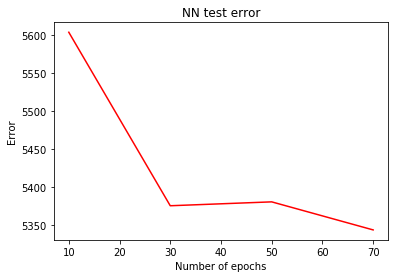

In [9]:
import matplotlib.pyplot as plt
plt.title("NN test error")
plt.xlabel("Number of epochs")
plt.ylabel("Error")
plt.plot(epoch, test_errs, 'r')
plt.show()

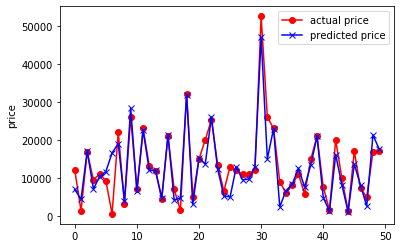

In [10]:
num_samples=50
idx=random.sample(range(len(y_test)),num_samples) 
plt.plot(range(num_samples),y_test[idx],'ro-')
plt.plot(range(num_samples),price_prediction[idx],'bx-')
plt.ylabel("price")
plt.legend(["actual price",'predicted price','mean price'])

In [12]:
dictData = {}
dictData['X_train'] = X_train
dictData['X_test'] = X_test
dictData['Y_train'] = y_train
dictData['y_test'] = y_test


In [13]:
display(dictData['Y_train'])

array([18321, 14995,  1900, ...,  8900,  6995, 28980])

In [14]:
display(dictData['y_test'])

array([ 7900,  7500,  9800, ..., 14500, 21800,  3500])